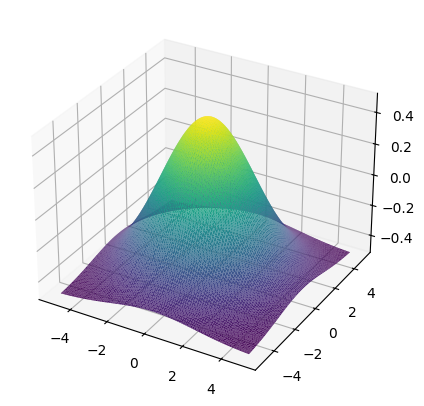

In [1]:
import matplotlib.pyplot as plt
from tools import generate_gaussian_data

patterns, targets = generate_gaussian_data(10000)

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(patterns[0], patterns[1], targets.ravel(), cmap='viridis')
plt.show()
